# Explore here

columnas Latitude, Longitude y MedInc.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores. Aunque estos conjuntos no se utilicen para obtener estadísticas, podrás utilizarlos para entrenar el algoritmo no supervisado y luego para hacer predicciones sobre puntos nuevos para predecir el cluster al que se asocian.

Paso 2: Construye un K-Means
Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

Paso 3: Predice con el conjunto de test
Ahora utiliza el modelo entrenado con el conjunto de prueba y añade los puntos al gráfico anterior para confirmar que la predicción es satisfactoria o no.

Paso 4: Entrena un modelo de clasificación supervisada
Ahora que el K-Means nos ha devuelto una categorización (agrupación) de los puntos para los conjuntos de entrenamiento y prueba, estudia qué modelo podría ser más útil y entrénalo. Obtén las estadísticas y describe lo que ves.

Este flujo es muy común cuando contamos con datos no etiquetados: utilizar un modelo de aprendizaje no supervisado para etiquetarlos de forma automática y a continuación, un modelo de aprendizaje supervisado.

Paso 5: Guarda los modelos
Almacena ambos modelos en la carpeta correspondiente.

In [9]:
# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Solo tenemos que quedar con las columnas Latitude, Longitude y MedInc.

In [10]:
SELECTION  = total_data[["MedInc", "Latitude", "Longitude"]]
SELECTION.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(SELECTION, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [14]:
from sklearn.cluster import KMeans

# Paso 2: Construye el modelo K-Means
kmeans = KMeans(n_clusters=6, random_state=42)

# Paso 3: Ajusta el modelo a los datos de entrenamiento
kmeans.fit(X_train)

# Paso 4: Predice los clusters para los datos de entrenamiento y prueba
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)

# Muestra los clusters asignados a los primeros elementos de los datos de entrenamiento y prueba
print("Clusters para los datos de entrenamiento:")
print(train_clusters[:5])
print("\nClusters para los datos de prueba:")
print(test_clusters[:5])

Clusters para los datos de entrenamiento:
[5 1 1 5 3]

Clusters para los datos de prueba:
[5 5 3 4 3]


In [15]:
# Añadir una nueva columna "cluster" al conjunto de datos de entrenamiento
X_train['cluster'] = train_clusters

# Añadir una nueva columna "cluster" al conjunto de datos de prueba
X_test['cluster'] = test_clusters

# Muestra las primeras filas del conjunto de datos de entrenamiento y prueba con la nueva columna "cluster"
print("Conjunto de datos de entrenamiento con la columna 'cluster':")
print(X_train.head())
print("\nConjunto de datos de prueba con la columna 'cluster':")
print(X_test.head())

Conjunto de datos de entrenamiento con la columna 'cluster':
       MedInc  Latitude  Longitude  cluster
14196  3.2596     32.71    -117.03        5
8267   3.8125     33.77    -118.16        1
17445  4.1563     34.66    -120.48        1
14265  1.9425     32.69    -117.11        5
2271   3.5542     36.78    -119.80        3

Conjunto de datos de prueba con la columna 'cluster':
       MedInc  Latitude  Longitude  cluster
20046  1.6812     36.06    -119.01        5
3024   2.5313     35.14    -119.46        5
15663  3.4801     37.80    -122.44        3
20484  5.7376     34.28    -118.72        4
9814   3.7250     36.62    -121.93        3


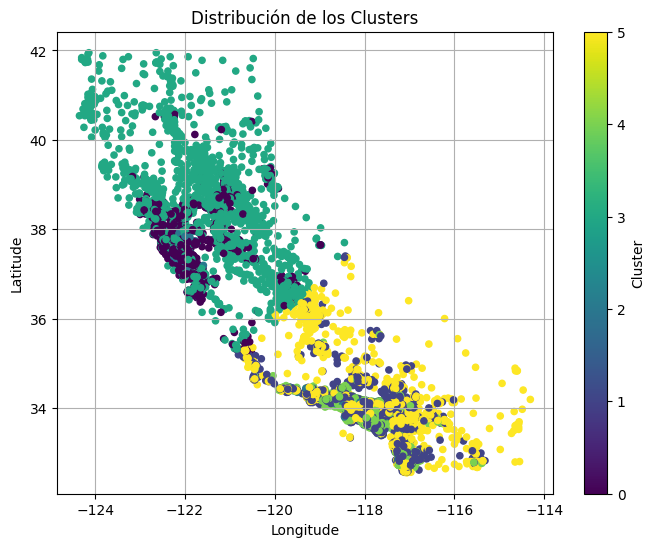

In [16]:
import matplotlib.pyplot as plt

# Graficar los clusters en un diagrama de puntos
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', s=20)
plt.title('Distribución de los Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()